Test VAE model on random frame of random file in `record`

In [39]:
#KOE Modifying to load image data stored with the Keras scripts
import numpy as np
import os
import json
import tensorflow as tf
import random
from doomrnn import reset_graph, ConvVAE
import random

rand_index = random.randint(0,100)

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [57]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "/home/kaiolae/code/word_models_keras_test/WorldModels/data_small_episodes"
model_path_name = "old_tf_models"
# NOTE: make sure you copy the vae model you want to test from tf_vae/vae.json to tf_models/vae.json

z_size=64

In [58]:
filelist = os.listdir(DATA_DIR)
print(filelist)

['action_data_doomrnn_4.npy', 'obs_data_doomrnn_10.npy', 'action_data_doomrnn_1.npy', 'obs_data_doomrnn_1.npy', 'action_data_doomrnn_9.npy', 'doom_images.npz', 'obs_data_doomrnn_3.npy', 'obs_data_doomrnn_4.npy', 'action_data_doomrnn_8.npy', 'obs_data_doomrnn_9.npy', 'doom_image_converter.py', 'action_data_doomrnn_2.npy', 'action_data_doomrnn_3.npy', 'action_data_doomrnn_5.npy', 'obs_data_doomrnn_2.npy', 'obs_data_doomrnn_7.npy', 'obs_data_doomrnn_6.npy', 'obs_data_doomrnn_8.npy', '.obs_data_doomrnn_1.npy.swp', 'action_data_doomrnn_7.npy', 'action_data_doomrnn_10.npy', 'action_data_doomrnn_6.npy', 'obs_data_doomrnn_5.npy']


In [59]:
all_episodes = np.load(DATA_DIR+"/obs_data_doomrnn_1.npy") #100 episodes from the game
one_random_episode = all_episodes[22] #One episode with up to 300 frames
one_random_episode = np.array(one_random_episode)
one_random_episode = one_random_episode.astype(np.float32)/255.0
print(len(one_random_episode))
one_random_picture = one_random_episode[3]
one_random_picture = np.array(one_random_picture)
print(one_random_picture.shape)
one_random_picture = one_random_picture.astype(np.float32)/255.0

104
(64, 64, 3)


In [60]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


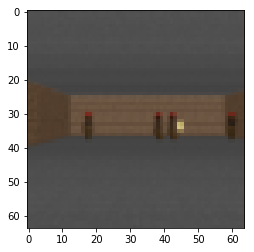

In [61]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(one_random_episode[rand_index])
plt.show()

In [62]:
batch_z = vae.encode(one_random_episode)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[-0.6739 -0.7578 -0.4781  0.8504 -0.0967 -0.6537 -1.5798  0.819  -1.0638 -0.7858 -1.288   1.0239
 -0.1698  0.6553 -2.004  -0.0171  0.2746  0.1412 -0.6734 -0.7478  1.858  -0.4468 -2.0687  0.9537
 -0.9949 -1.0411  0.202  -0.7082 -0.0901 -0.0551  0.9923 -0.0486 -0.4252 -0.6144 -1.2934  1.9667
 -1.2575  0.6226  0.168  -0.5425  1.2257  1.495   0.3857  1.4071 -0.0073 -0.4833  0.4753 -0.2596
  0.7592  1.3013 -0.3408  1.1998 -1.1635 -1.1277 -0.1724 -0.0458  0.5876 -0.3722  0.0263  0.5065
 -0.4533  0.1279 -0.2126  1.962 ]


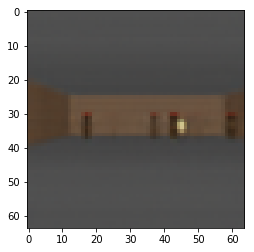

In [63]:
# show reconstruction
plt.imshow(reconstruct[rand_index])
plt.show()